# Project Description

The goal is to identify patterns that determine the success of a game based on historical data about games. This will enable betting on a potentially popular product and planning advertising campaigns.

# Data Upload and Overview

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

In [ ]:
df=pd.read_csv('/datasets/games.csv')

In [ ]:
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

It is recommended to convert the column names to the snake_case format for consistency and readability.

Also, the Year_of_Release column currently contains values in a string format, and it's recommended to convert them to integers for easier manipulation and analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The values in the User_Score column should be converted to float format

In [ ]:
df.isna().sum().sort_values(ascending = False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

# Data Preparation

## Bringing columns to lowercase

In [ ]:
df.columns = df.columns.str.lower()

## Missing values handling

### Name and Genre

In [ ]:
df['name'] = df['name'].fillna('-')
df['genre'] = df['genre'].fillna('-')

<div class="alert alert-block alert-info">
It is best to replace string variables with undefined values for name and genre with a placeholder of the same string type, such as "-". Filling in the placeholders allows for the use of values from other columns. Another option is to delete the rows. Since there are only a few missing values, deleting or replacing them will not significantly affect the results.
</div>

### User Score

In [ ]:
df.isna().sum().sort_values(ascending = False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [ ]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

The most common meaning of "tbd" is "to be declared" or "to be decided". This indicates that the rating has not yet been assigned.

Let's take a look at the distribution without this value.

In [ ]:
user_score = df[df['user_score'] != 'tbd']['user_score']
user_score = user_score.astype(float)

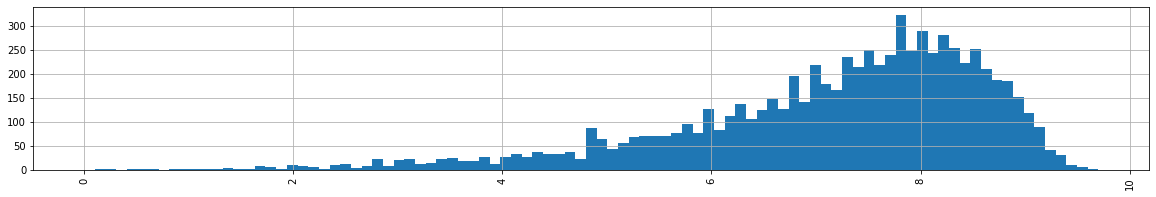

In [ ]:
plt.figure(figsize=(20,3));
plt.xticks(rotation='vertical')
user_score.hist(bins = 95);

To replace missing data, let's use "nan" instead of "tbd". This will allow us to randomly fill in the gaps using values drawn from a distribution later on.

In [ ]:
def tbd_to_nan(cell):
    if cell == "tbd":
        return float("NaN")
    else:
        return cell

df['user_score'] = df['user_score'].apply(tbd_to_nan)

In [ ]:
# Changing data type from object to float
df['user_score'] = df['user_score'].astype(float)

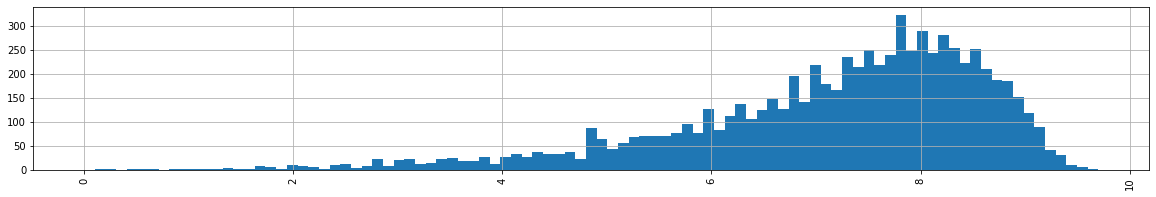

In [ ]:
plt.figure(figsize=(20,3));
plt.xticks(rotation='vertical')
df['user_score'].hist(bins = 95);

In [ ]:
user_score_table = df.sort_values(by = 'year_of_release').pivot_table(index = 'name', values = 'user_score', aggfunc = ['count', 'sum', lambda x : x.isna().sum()]).sort_values(by = ('count', 'user_score'), ascending = False)

user_score_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)
user_score_table[user_score_table[('nan_count','user_score')] > 0].sort_values(by = [('count', 'user_score'),('nan_count', 'user_score')], ascending = False)

/tmp/ipykernel_37/3817901470.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  user_score_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)


count        sum  \
                                                   user_score user_score   
name                                                                       
Need for Speed: Most Wanted                                 9       75.4   
LEGO Marvel Super Heroes                                    8       56.1   
FIFA 14                                                     8       34.7   
Madden NFL 08                                               7       46.1   
Ratatouille                                                 6       40.1   
...                                                       ...        ...   
Karate                                                      0        0.0   
Karaoke Revolution Glee 2: Road to Regionals                0        0.0   
Karaoke Revolution Glee                                     0        0.0   
Karaoke Joysound Wii Super DX: Hitori de Minna ...          0        0.0   
¡Shin Chan Flipa en colores!                                0        0.0   

                                                    nan_count  
                                                   user_score  
name                                                           
Need for Speed: Most Wanted                               3.0  
LEGO Marvel Super Heroes                                  1.0  
FIFA 14                                                   1.0  
Madden NFL 08                                             1.0  
Ratatouille                                               3.0  
...                                                       ...  
Karate                                                    1.0  
Karaoke Revolution Glee 2: Road to Regionals              1.0  
Karaoke Revolution Glee                                   1.0  
Karaoke Joysound Wii Super DX: Hitori de Minna ...        1.0  
¡Shin Chan Flipa en colores!                              1.0  

[7633 rows x 3 columns]

In [ ]:
# As an example, let's take "Need for Speed"
df[df['name'] == 'Need for Speed: Most Wanted'][['user_score', 'year_of_release', 'platform']].sort_values(by = 'year_of_release')

user_score  year_of_release platform
253           9.1           2005.0      PS2
1591          8.5           2005.0     X360
1998          8.8           2005.0       XB
3581          9.1           2005.0       GC
5972          8.5           2005.0       PC
6410          6.1           2005.0       DS
6473          8.3           2005.0      GBA
523           NaN           2012.0      PS3
1190          8.5           2012.0     X360
2048          NaN           2012.0      PSV
11715         8.5           2012.0       PC
6273          NaN           2013.0     WiiU

Depending on the platform, the ratings may vary significantly. As such, it is recommended to avoid filling in any gaps in the information provided, to ensure accuracy and avoid potential misinterpretations.

### Rating

To fill in the gaps in the ranking, you can use the game titles, which may be listed on some platforms but not on others. Let's collect information from the platforms where the game names are available.

In [ ]:
rating_table = df.sort_values(by = 'year_of_release').pivot_table(index = 'name', values = 'rating', aggfunc = ['count', 'sum', lambda x : x.isna().sum()]).sort_values(by = ('count', 'rating'), ascending = False)

rating_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)
rating_table[rating_table[('nan_count','rating')] > 0].sort_values(by = ('count', 'rating'), ascending = False)

/tmp/ipykernel_37/2030946044.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  rating_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)


count    sum nan_count
                             rating rating    rating
name                                                
Need for Speed: Most Wanted       9    NaN         3
Ratatouille                       8    NaN         1
FIFA 14                           8    NaN         1
LEGO Marvel Super Heroes          8    NaN         1
LEGO The Hobbit                   7    NaN         1
...                             ...    ...       ...
Excitebike                        0      0         1
Excitebike 64                     0      0         1
Exhibition                        0      0         1
Exhibition Volume 02              0      0         1
¡Shin Chan Flipa en colores!      0      0         1

[5853 rows x 3 columns]

In [ ]:
# As an example, let's take "Need for Speed"
df[df['name'] == 'Need for Speed: Most Wanted'][['rating', 'year_of_release']].sort_values(by = 'year_of_release')

rating  year_of_release
253        T           2005.0
1591       T           2005.0
1998       T           2005.0
3581       T           2005.0
5972       T           2005.0
6410       E           2005.0
6473       E           2005.0
523      NaN           2012.0
1190       T           2012.0
2048     NaN           2012.0
11715      T           2012.0
6273     NaN           2013.0

In [ ]:
# Find all missing values in the 'rating' column
missing_ratings = df[df['rating'].isna()][['name', 'rating']]
missing_ratings['index1'] = missing_ratings.index

# Sort the data by game title and year of release, and create a pivot table that shows the last available rating for each game
last_ratings = df.sort_values(by=['name', 'year_of_release'], ascending=False).pivot_table(index='name', values='rating', aggfunc='first')

# Select only the ratings for games that have missing values in the 'rating' column
ratings_to_fill = last_ratings.loc[missing_ratings['name'].values]

# Merge the selected ratings with the rows that have missing values
merged = pd.merge(missing_ratings, ratings_to_fill, on='name', how='inner').drop(columns='rating_x').rename(columns={'rating_y': 'rating'})

# Merge the filled missing values back to the original dataframe
merged_df = pd.merge(df, merged[['index1', 'rating']], left_index=True, right_on='index1', how='left').set_index('index1')


In [ ]:
df['rating'].isna().sum()

6766

In [ ]:
# filling the missing values
df['rating'] = gross_merged['rating_x'].fillna(gross_merged['rating_y'])

In [ ]:
df['rating'].isna().sum()

6329

Although there has been a reduction in the number of absences, it hasn't been a substantial one.

### Critic Score

In [ ]:
critic_score_table = df.sort_values(by = 'year_of_release').pivot_table(index = 'name', values = 'critic_score', aggfunc = ['count', 'sum', lambda x : x.isna().sum()]).sort_values(by = ('count', 'critic_score'), ascending = False)

critic_score_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)
critic_score_table[user_score_table[('nan_count','user_score')] > 0].sort_values(by = [('count', 'critic_score'),('nan_count', 'critic_score')], ascending = False)

/tmp/ipykernel_37/3546339396.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  critic_score_table.columns.set_levels(['count','sum','nan_count'],level=0,inplace=True)
/tmp/ipykernel_37/3546339396.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  critic_score_table[user_score_table[('nan_count','user_score')] > 0].sort_values(by = [('count', 'critic_score'),('nan_count', 'critic_score')], ascending = False)


count          sum  \
                                                   critic_score critic_score   
name                                                                           
Need for Speed: Most Wanted                                   8        620.0   
Madden NFL 08                                                 8        617.0   
Cars                                                          8        516.0   
Ratatouille                                                   7        427.0   
LEGO Harry Potter: Years 5-7                                  7        513.0   
...                                                         ...          ...   
Ken to Mahou to Gakuen Mono. Final: Shinnyusei ...            0          0.0   
Ken to Mahou to Gakuen Mono. 3D                               0          0.0   
Ken to Mahou to Gakuen Mono. 2G                               0          0.0   
Ken to Mahou to Gakuen Mono. 2                                0          0.0   
¡Shin Chan Flipa en colores!                                  0          0.0   

                                                      nan_count  
                                                   critic_score  
name                                                             
Need for Speed: Most Wanted                                 4.0  
Madden NFL 08                                               0.0  
Cars                                                        0.0  
Ratatouille                                                 2.0  
LEGO Harry Potter: Years 5-7                                1.0  
...                                                         ...  
Ken to Mahou to Gakuen Mono. Final: Shinnyusei ...          1.0  
Ken to Mahou to Gakuen Mono. 3D                             1.0  
Ken to Mahou to Gakuen Mono. 2G                             1.0  
Ken to Mahou to Gakuen Mono. 2                              1.0  
¡Shin Chan Flipa en colores!                                1.0  

[7633 rows x 3 columns]

In [ ]:
# As an example, let's take "Need for Speed"
df[df['name'] == 'Need for Speed: Most Wanted'][['critic_score', 'year_of_release', 'platform']].sort_values(by = 'year_of_release')

critic_score  year_of_release platform
253            82.0           2005.0      PS2
1591           83.0           2005.0     X360
1998           83.0           2005.0       XB
3581           80.0           2005.0       GC
5972           82.0           2005.0       PC
6410           45.0           2005.0       DS
6473            NaN           2005.0      GBA
523             NaN           2012.0      PS3
1190           83.0           2012.0     X360
2048            NaN           2012.0      PSV
11715          82.0           2012.0       PC
6273            NaN           2013.0     WiiU

Grading systems differ across platforms, so it's advisable to refrain from filling in any missing information.

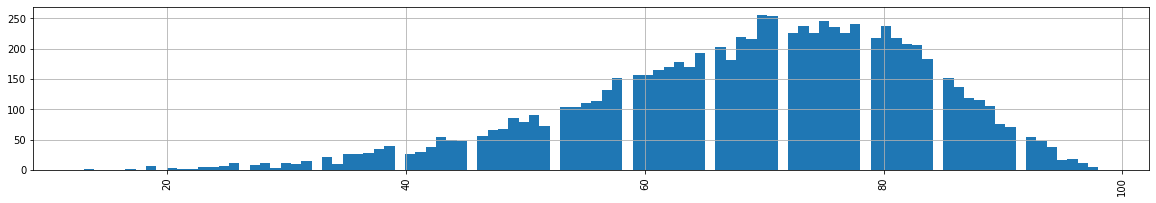

In [ ]:
plt.figure(figsize=(20,3));
plt.xticks(rotation='vertical')
df['critic_score'].hist(bins = 98);

Conclusion: User and critic ratings have a significant number of gaps, and it's better not to fill them in to avoid drawing incorrect conclusions during analysis. Some of the missing ratings were partially restored using game titles.

It's probable that the presence of gaps is related to the fact that ratings for different platforms have not yet been assigned (the most recent platforms don't have ratings), or the sample size is insufficient (the platform is not popular).

# Exploratory Data Analysis

## Games by years

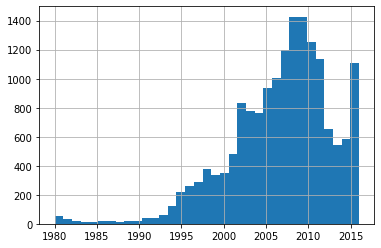

In [ ]:
df['year_of_release'].hist(bins = 35);

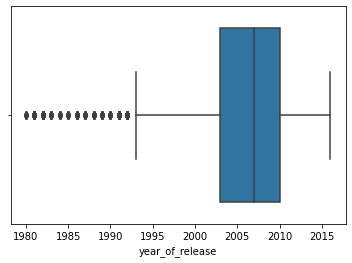

In [ ]:
ax = sns.boxplot(x=df['year_of_release'])

To conduct a thorough analysis, data from 1993 onwards is crucial.

In [ ]:
df = df[df['year_of_release'] >= 1993]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16141 non-null  object 
 1   platform         16141 non-null  object 
 2   year_of_release  16141 non-null  float64
 3   genre            16141 non-null  object 
 4   na_sales         16141 non-null  float64
 5   eu_sales         16141 non-null  float64
 6   jp_sales         16141 non-null  float64
 7   other_sales      16141 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           10171 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Amount of missing values decreased

## Sales per platform

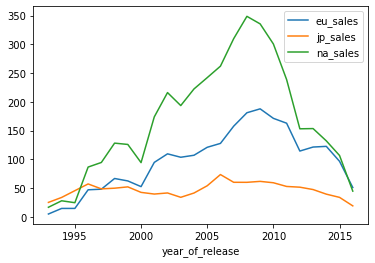

In [ ]:
df.pivot_table(index = 'year_of_release', values = ('na_sales', 'eu_sales', 'jp_sales'), aggfunc= 'sum').plot();

In [ ]:
df['platform']

0         Wii
2         Wii
3         Wii
4          GB
6          DS
         ... 
16710     PS3
16711    X360
16712     PSV
16713     GBA
16714     PSV
Name: platform, Length: 16141, dtype: object

In [ ]:
df['sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

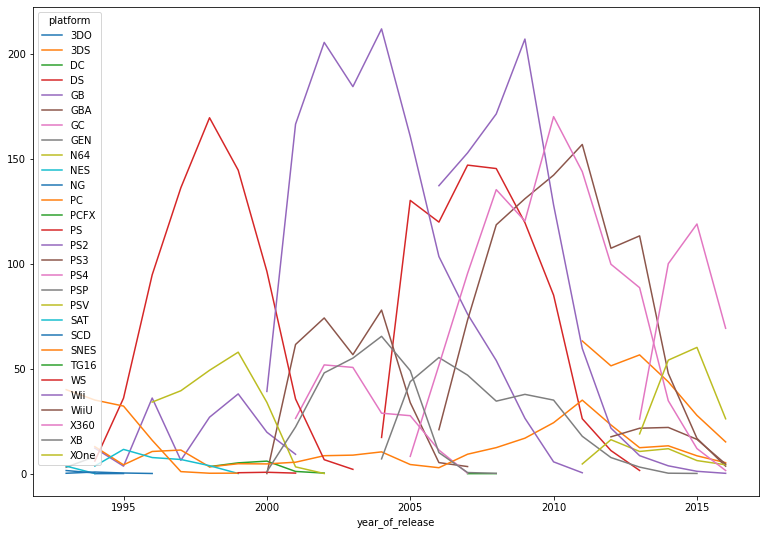

In [ ]:
df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum').plot(figsize=(13,9));

In [ ]:
sales_per_platform = df.pivot_table(index = 'platform', values = 'sales', aggfunc = 'sum').sort_values(by = 'sales', ascending = False)

In [ ]:
platforms_filtered = sales_per_platform.query('sales > 300').reset_index()['platform']

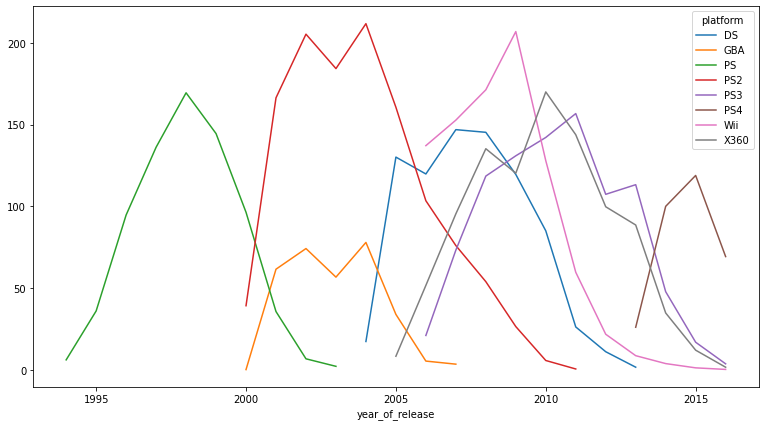

In [ ]:
df.query('platform in @platforms_filtered.tolist()').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum').plot(figsize = (13,7));

Typically, the dominant platform changes approximately every 5 years. However, between 2007 and 2012, competition significantly intensified, resulting in leaders changing every 2-3 years. To make an accurate forecast for 2017, it is advisable to use data starting from 2014.

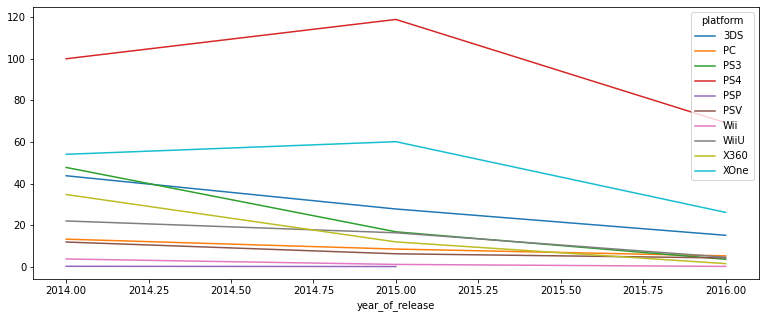

In [ ]:
df_newest = df.query('year_of_release >= 2014')
df_newest.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum').plot(figsize = (13, 5));

In [ ]:
df_newest.pivot_table(index = 'platform', values = 'sales', aggfunc = 'sum').sort_values(by = 'sales', ascending = False)

sales
platform        
PS4       288.15
XOne      140.36
3DS        86.68
PS3        68.18
X360       48.22
WiiU       42.98
PC         27.05
PSV        22.40
Wii         5.07
PSP         0.36

During the period from 2014 to 2016, the PS4 and Xbox One dominated the gaming market, experiencing their peak sales in 2015, followed by a decline in 2016. In contrast, other gaming platforms had already reached their peak sales prior to this time and have since continued to experience a decline in sales.

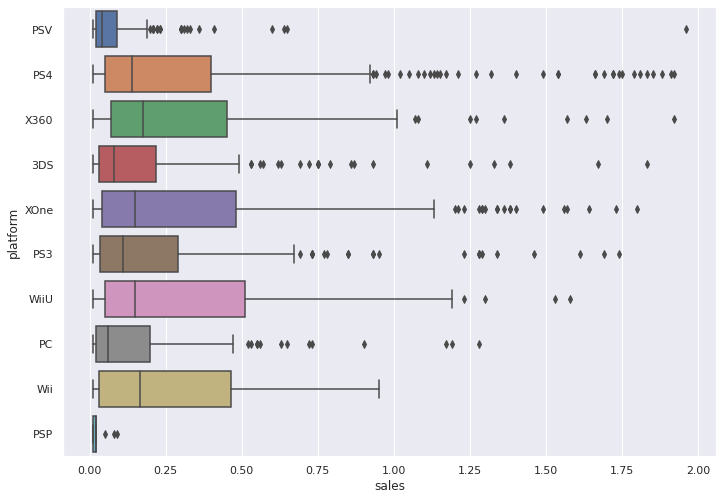

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(y=df_newest.query('sales < 2')['platform'], x = df['sales']);

All platforms exhibit a right-skewed distribution, with the PS4 platform having the longest tail of reliable sales data. The median value does not exceed 0.25 million, and the X360 platform has the highest maximum sales value.

## Dependence of sales on reviews

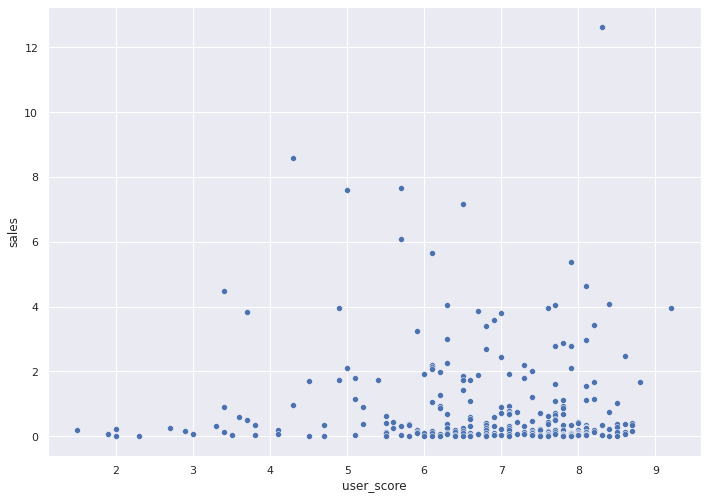

In [ ]:
sns.scatterplot(data=df[df['platform'] == "PS4"], x="user_score", y="sales");

In [ ]:
print(df[df['platform'] == "PS4"]['sales'].corr(df[df['platform'] == "PS4"]['user_score']))

-0.031957110204556376


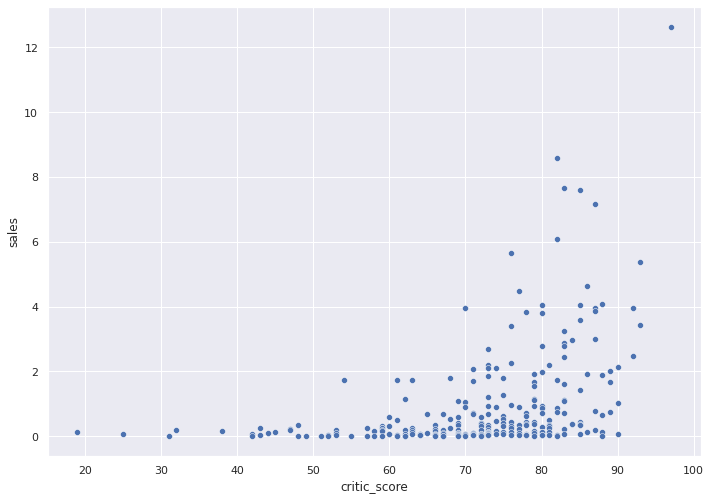

In [ ]:
sns.scatterplot(data=df[df['platform'] == "PS4"], x="critic_score", y="sales");

In [ ]:
print(df[df['platform'] == "PS4"]['sales'].corr(df[df['platform'] == "PS4"]['critic_score']))

0.406567902061781


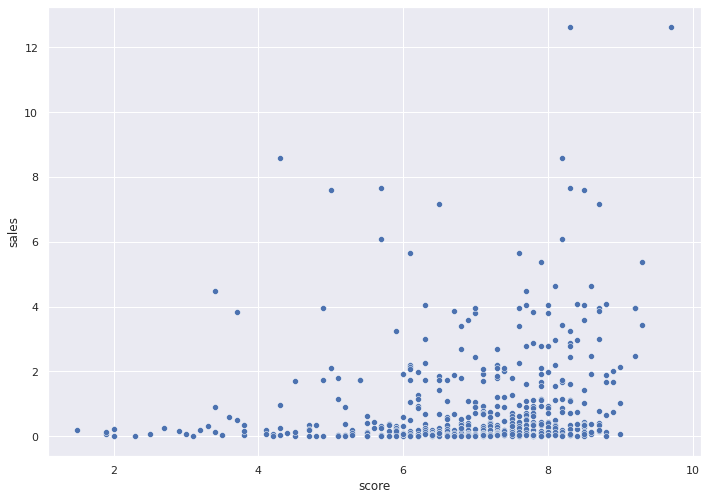

In [ ]:
#объединение оценок пользователей и критиков
sales_vs_user_score = df[['platform', 'sales', 'user_score']]
sales_vs_critic_score = df[['platform', 'sales', 'critic_score']]

sales_vs_critic_score['critic_score'] = sales_vs_critic_score['critic_score']/10 # нормализация

sales_vs_user_score = sales_vs_user_score.rename(columns = {'user_score':'score'})
sales_vs_critic_score = sales_vs_critic_score.rename(columns = {'critic_score':'score'})

frames = [sales_vs_user_score, sales_vs_critic_score]

sales_vs_score = pd.concat(frames)

sns.scatterplot(data=sales_vs_score.query('platform == "PS4"'), x="score", y="sales");

In [ ]:
print(sales_vs_score.query('platform == "PS4"')['sales'].corr(sales_vs_score.query('platform == "PS4"')['score']))

0.16679436274987083


the correlation coefficient is very low, i.e. there is no dependence of sales on reviews

In [ ]:
platforms_list = sales_vs_score['platform'].unique()
corr_dict = {"platform":[], "corr":[]}
i = 0
for i in range(len(platforms_list)):
  corr_dict["platform"].append(platforms_list[i])
  corr_dict["corr"].append(round(sales_vs_score.query('platform == @platforms_list[@i]')['sales'].corr(sales_vs_score.query('platform == @platforms_list[@i]')['score']),2))
  i+=1

pd.DataFrame.from_dict(corr_dict).sort_values(by = "corr", ascending = False)


platform  corr
10       PS  0.38
16     WiiU  0.38
12       XB  0.29
5       PS2  0.28
8       3DS  0.28
17       GC  0.28
4       PS3  0.27
14      PSP  0.27
3      X360  0.25
6       GBA  0.20
2        DS  0.19
7       PS4  0.17
15     XOne  0.16
0       Wii  0.14
13       PC  0.11
20      PSV  0.06
18       DC -0.05
1        GB   NaN
9       N64   NaN
11     SNES   NaN
19      GEN   NaN
21      SAT   NaN
22      NES   NaN
23      SCD   NaN
24       WS   NaN
25       NG   NaN
26     TG16   NaN
27      3DO   NaN
28     PCFX   NaN

the conclusions are the same - there is no correlation of sales with reviews

## Games by genres

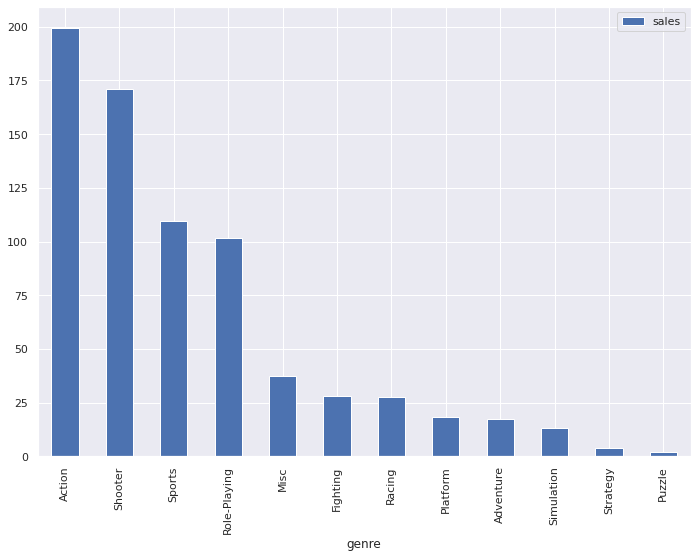

In [ ]:
df_newest.pivot_table(index = 'genre', values = 'sales', aggfunc = 'sum').sort_values(by = 'sales', ascending = False).plot(kind = 'bar');

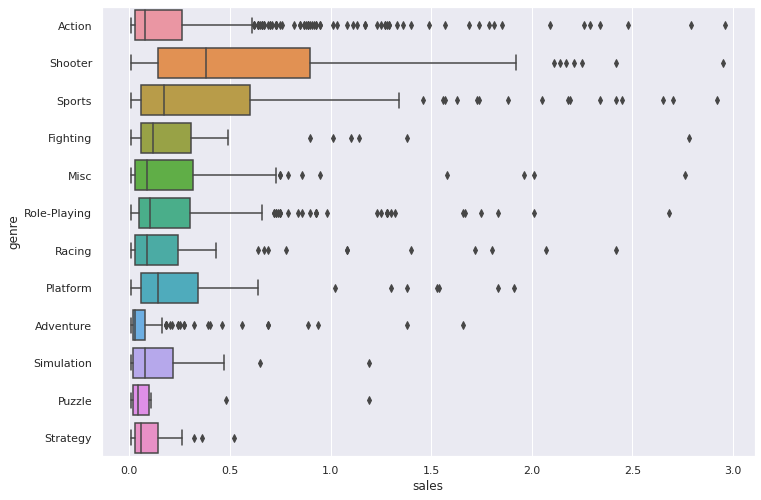

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(y=df_newest.query('sales < 3').sort_values(by = 'sales', ascending = False)['genre'], x = df['sales']);

The most profitable genres are action and shooter. Sales distribution for action games is narrow, while shooter games have a broad distribution.

The median of the sales distribution for shooter games is significantly higher than for other genres. This suggests that the profitability of shooter games is due to a few successful titles.

Among other profitable genres, sports and role-playing stand out, with combined sales just falling short of 100 million copies within the 2014-2016 period.

The median of the sales distribution for sports games is second only to shooter games, and the distribution is also broad. The median for role-playing games is also relatively high, but comparable to other genres such as action, simulation, misc, fighting, racing, and platform. The distribution width for role-playing games is third after shooter and sports games.

The least profitable genres are puzzle and strategy. The median of the sales distribution for these genres is low, and the distributions are narrow.

In summary, it should be noted that during the 2014-2016 period, high sales for shooter, sports, and role-playing games were mainly driven by individual games that sold in large quantities. This suggests that the quality of the games plays a significant role. For action games, high total sales are achieved by numerous different games, indicating that the quantity of games played a significant role.

Genres with low sales (less than 50 million copies during the 2014-2016 period), such as misc, fighting, racing, platform, adventure, simulation, strategy, and puzzle, can be divided into two categories. The first category consists of puzzle, strategy, and adventure, which have low median and narrow distribution (genres that rely on quantity). The second category consists of misc, fighting, racing, platform, and simulation, which have high median and broad distribution (genres that rely on quality).

# Portrait of a user from each region

## Most popular platforms

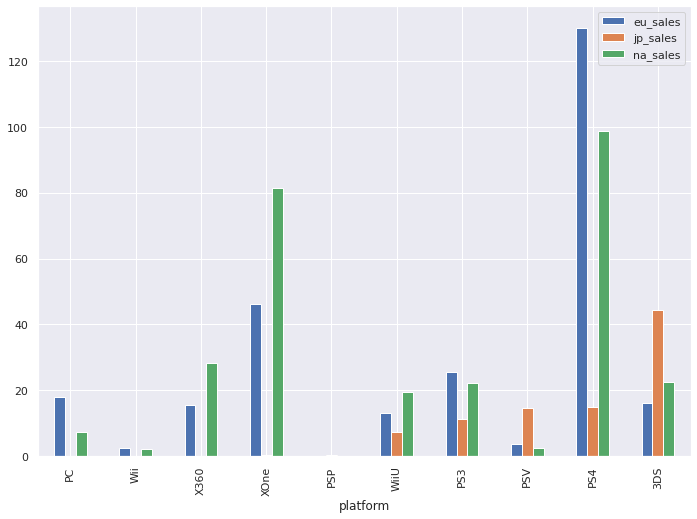

In [ ]:
df_newest.pivot_table(index = 'platform', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').sort_values(by = 'jp_sales').plot(kind = 'bar');

In [ ]:
# percentage of sales made across all available platforms
df_newest.pivot_table(index = 'platform', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').apply(lambda x:100 * x / float(x.sum())).round(2).sort_values(by = 'eu_sales', ascending = False)

eu_sales  jp_sales  na_sales
platform                              
PS4          48.04     16.13     34.71
XOne         17.09      0.34     28.61
PS3           9.44     12.05      7.76
PC            6.64      0.00      2.55
3DS           5.96     47.52      7.97
X360          5.72      0.09      9.96
WiiU          4.86      7.85      6.82
PSV           1.30     15.62      0.89
Wii           0.96      0.00      0.73
PSP           0.00      0.39      0.00

The most popular platforms are:

- Europeans prefer PS4, XOne, PS3, PC, and 3DS.
- Americans favor PS4, XOne, X360, 3DS, and PS3.
- The Japanese prefer 3DS, PS4, PSV, PS3, and WiiU.

The third and fourth PS are in the top 5 in all regions. The 3DS platform, which is not well understood in Europe and North America, is the most popular in Japan.

## Most Popular Genres


In [ ]:
# The percentage of sales across all platforms
df_newest.pivot_table(index = 'genre', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').apply(lambda x:100 * x / float(x.sum())).round(2).sort_values(by = 'jp_sales', ascending = False)

eu_sales  jp_sales  na_sales
genre                                     
Role-Playing     10.41     33.47     11.78
Action           27.59     31.78     25.53
Fighting          2.47      6.84      4.38
Misc              4.75      6.03      5.30
Shooter          24.21      5.23     27.82
Adventure         2.40      3.87      1.99
Sports           16.89      3.50     16.24
Platform          2.51      2.89      2.39
Simulation        2.70      2.48      0.93
Racing            5.22      1.89      3.08
Strategy          0.66      1.02      0.34
Puzzle            0.19      1.00      0.23

The most popular genres are:

Among Europeans: action, shooter, sports, role-playing, and racing
Among Americans: shooter, action, sports, role-playing, and miscellaneous
Among Japanese: role-playing, action, fighting, miscellaneous, and shooter
Action, shooter, and role-playing are in the top 5 in all regions. However, only action is equally liked by everyone. Japanese gamers clearly do not prefer shooters as their first choice. Role-playing is more important to them than it is to Europeans and Americans. The Japanese love for martial arts is reflected in the presence of the fighting genre in their top 5. Europeans seem to lack the streets to race on, so they satisfy their need for speed with racing games. In contrast, Americans prefer destruction in the vastness of their prairies. Speed does not seem to be significant in Japanese culture, so the racing genre falls far outside their top 5.

## The impact of the ESBR rating on sales in the regions

In [ ]:
# expression as a percentage of sales across all platforms
df_newest.pivot_table(index = 'rating', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').apply(lambda x:100 * x / float(x.sum())).round(2).sort_values(by = 'jp_sales', ascending = False)

eu_sales  jp_sales  na_sales
rating                              
T          15.84     42.13     17.52
E          26.15     23.24     22.10
M          45.67     22.28     45.35
E10+       12.34     12.34     15.03

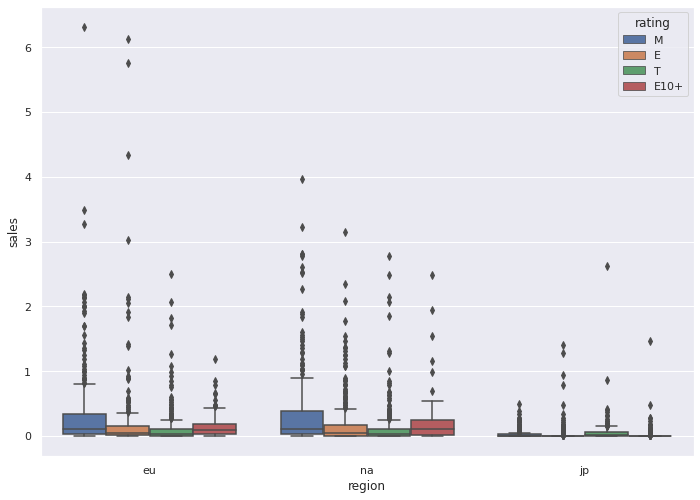

In [ ]:
# combining sales data by region
eu_sales_vs_rating = df_newest[['eu_sales', 'rating']]
na_sales_vs_rating = df_newest[['na_sales', 'rating']]
jp_sales_vs_rating = df_newest[['jp_sales', 'rating']]

eu_sales_vs_rating = eu_sales_vs_rating.rename(columns = {'eu_sales':'sales'})
na_sales_vs_rating = na_sales_vs_rating.rename(columns = {'na_sales':'sales'})
jp_sales_vs_rating = jp_sales_vs_rating.rename(columns = {'jp_sales':'sales'})

eu_sales_vs_rating['region'] = "eu"
na_sales_vs_rating['region'] = "na"
jp_sales_vs_rating['region'] = "jp"

frames = [eu_sales_vs_rating, na_sales_vs_rating, jp_sales_vs_rating]

sales_vs_rating = pd.concat(frames)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(y= sales_vs_rating['sales'], x = sales_vs_rating['region'], hue = sales_vs_rating['rating']);

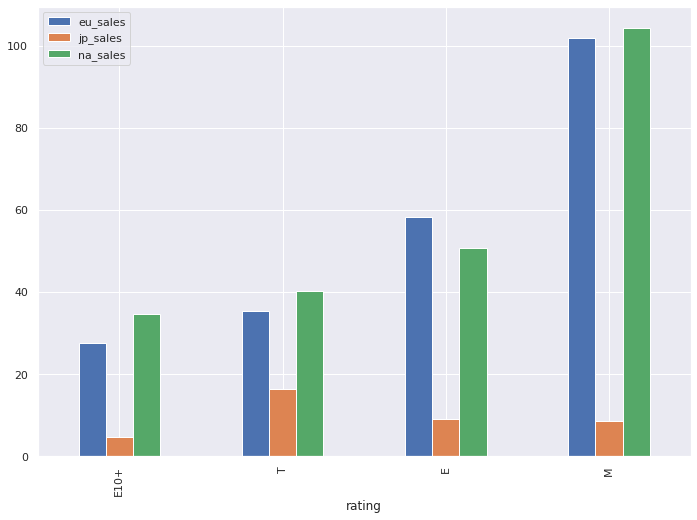

In [ ]:
df_newest.pivot_table(index = 'rating', values = ('eu_sales', 'na_sales', 'jp_sales'), aggfunc = 'sum').sort_values(by = 'eu_sales').plot(kind = 'bar');

The rating system has a similar impact on sales in Europe and America. The highest selling rating is M, followed by E, T, and E10+. However, in Japan, it's a different story. The highest selling rating is T, followed by E, M, and E10+.

This suggests that the rating system has a regional impact on sales.

# Hypothesis Testing

Null hypothesis: The average user ratings for Xbox One and PC platforms are equal.

Alternative hypothesis: The average user ratings for Xbox One and PC platforms differ.

In [ ]:
sample_PC = df_newest.query('platform == "PC"')['user_score'].dropna()
sample_XOne = df_newest.query('platform == "XOne"')['user_score'].dropna()

alpha = .05 # The critical level of statistical significance
# is the threshold below which we will reject the null hypothesis if the p-value falls. 

results = st.ttest_ind(
    sample_PC, 
    sample_XOne)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


The statistical hypothesis of equal mean user ratings for two platforms cannot be rejected, indicating that users rate games rather than platforms, and in most cases, these ratings are similar. However, as discovered during the missing data filling process, some platforms have significantly different ratings, which may be attributed to technical peculiarities when transferring games from one platform to another.

Null Hypothesis: The average user ratings for the Action and Sports genres are the same.

Alternative Hypothesis: The average user ratings for the Action and Sports genres are different.

In [ ]:
sample_Action = df_newest.query('genre == "Action"')['user_score'].dropna()
sample_Sports = df_newest.query('genre == "Sports"')['user_score'].dropna()

alpha = .05 # The critical level of statistical significance
# is the threshold below which we will reject the null hypothesis if the p-value falls. 

results = st.ttest_ind(
    sample_Action, 
    sample_Sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


The statistical hypothesis claiming that the average user ratings for two genres are equal has been rejected. This is consistent with the study's findings, which demonstrate that user profiles, including genre preferences, differ across the world.

Conclusion: Statistical hypotheses were formulated according to the usual algorithm for formulating statistical hypotheses. The null hypothesis always assumes similarity between two samples, while the alternative hypothesis assumes difference. Everything is standard, with no room for creativity, at least at this level of knowledge. The data on user ratings of games were used as a basis. The critical level of statistical significance was set at 5%. The test results did not come as a surprise.

The null hypothesis of equal average user ratings for two platforms is not rejected; however, it is unlikely to be true based on the research results.

The null hypothesis of equal average user ratings for two genres is confidently rejected, as confirmed by the research results.

# Final Conclusion

To identify the patterns that determine a game's success, a period from 2014 to 2016 was chosen. It's not advisable to take a longer period since the market landscape changes over time, and competition among platforms increases. The speed of changing gaming trends has also increased; before 2007, leaders among gaming platforms changed every five years, but after that, they changed every two to three years. Since the forecast is for 2017, the interval chosen should not exceed three years, i.e., 2014-2016.

Currently, the most popular platforms are PS4 and XOne, but their popularity began to decline in 2015. This means that a new gaming platform will soon appear on the market, and betting on it could lead to profits in the following years.

Reviews by both users and critics are not influential in sales.

The most profitable game genres are action and shooter. To maximize profits in the shooter genre, a small number of high-quality games should be developed, whereas in the action genre, a large number of games should be developed.

The market to focus on when choosing the PS4 platform is not significant, while for games on XOne, the European or North American market is preferred. When choosing the action genre, the market is also not essential, whereas shooter games may be less in demand in Japan. Ratings affect sales differently in the western and eastern worlds. In Europe and North America, games with an M rating have high sales, while in Japan, games with a T rating have higher sales.